In [456]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import ShuffleSplit
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [457]:
# Read csv file and drop 'id' column and last column due to error in import
data = pd.read_csv('data.csv')
data.drop('id', axis=1, inplace=True)
data.drop(data.columns[-1], axis=1, inplace=True)

In [458]:
# Change pandas option to display all columns
pd.set_option('display.max_columns', None)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [459]:
pd.set_option('display.max_columns', None)

data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


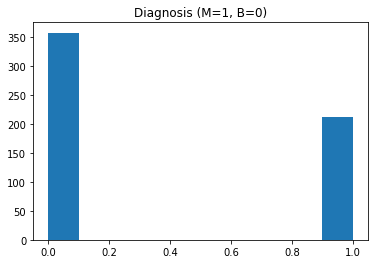

In [460]:
# Map diagnosis from character to integer value
# M = Malignant -> 1
# B = Benign -> 0
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

# Plot count of samples of both classes
plt.hist(data['diagnosis'])
plt.title('Diagnosis (M=1, B=0)')
plt.show()

In [461]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [462]:
# Get stats of each of the 2 classes
data_malignant = data[data['diagnosis'] == 1]
data_benign = data[data['diagnosis'] == 0]

data_malignant.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,1.0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,0.0,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,0.345039,0.483178,2.568546,61.355268,0.002890,0.018387,0.021603,0.005517,0.010065,0.002041,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,1.0,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,0.193800,0.362100,1.334000,13.990000,0.002667,0.008422,0.011010,0.005174,0.007882,0.001087,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,1.0,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,0.390375,0.892825,2.715500,35.762500,0.005085,0.019662,0.026998,0.011415,0.014615,0.002688,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,1.0,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,0.547200,1.102500,3.679500,58.455000,0.006209,0.028590,0.037125,0.014205,0.017700,0.003739,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,1.0,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,0.757300,1.429250,5.206250,94.000000,0.007971,0.038910,0.050443,0.017497,0.022132,0.004892,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,1.0,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,3.568000,21.980000,542.200000,0.031130,0.135400,0.143800,0.040900,0.078950,0.012840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [80]:
data_benign.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,0.0,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,0.0,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,0.0,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,0.0,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,0.0,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,0.0,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [392]:
# Print difference between the stats of the two classes
data_diff = data_malignant.describe() - data_benign.describe()
data_diff

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,-145.0,-145.000000,-145.000000,-145.000000,-145.000000,-145.000000,-145.000000,-145.000000,-145.000000,-145.000000,...,-145.000000,-145.000000,-145.000000,-145.000000,-145.000000,-145.000000,-145.000000,-145.000000,-145.000000,-145.000000
mean,1.0,5.316306,3.690144,37.289971,515.586219,0.010421,0.065103,0.114717,0.062273,0.018723,...,7.755010,5.803138,54.364392,863.386881,0.019886,0.192152,0.284368,0.107793,0.053222,0.012088
std,0.0,1.423459,-0.215655,10.047216,233.650859,-0.000838,0.020238,0.031577,0.018465,0.002831,...,2.302202,-0.059150,15.929964,434.366319,0.001856,0.078192,0.041139,0.010510,0.032940,0.007749
min,1.0,3.969000,0.670000,28.110000,218.100000,0.021080,0.026670,0.023980,0.020310,0.024800,...,4.910000,4.650000,34.690000,322.900000,0.017050,0.024020,0.023980,0.028990,-0.000100,-0.000170
25%,1.0,3.995000,4.177500,27.875000,327.100000,0.010950,0.053980,0.089215,0.049600,0.016050,...,5.650000,6.202500,41.055000,523.200000,0.020075,0.132475,0.249345,0.101710,0.035900,0.006212
50%,1.0,5.125000,4.070000,36.020000,473.600000,0.011440,0.057060,0.114260,0.062840,0.018500,...,7.240000,6.125000,51.080000,755.600000,0.018050,0.186550,0.263700,0.107690,0.041600,0.010480
75%,1.0,6.220000,4.005000,43.825000,652.650000,0.010225,0.074850,0.143060,0.070665,0.020850,...,9.007500,6.180000,63.210000,1042.750000,0.018375,0.217650,0.334575,0.113185,0.060925,0.017215
max,1.0,10.260000,5.470000,73.900000,1508.900000,-0.018700,0.121500,0.016000,0.115860,0.029700,...,16.220000,7.760000,124.100000,3044.000000,0.022000,0.473100,-0.082000,0.116000,0.241000,0.058900


In [394]:
# Get the difference as a percentage with respect to the benign stats
data_diff_percent = abs(data_diff) / data_benign.describe() * 100
data_diff_percent

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246
mean,inf,43.768130,20.598341,47.761482,111.408198,11.268500,81.292962,249.072995,242.141814,10.748837,0.297930,114.403514,0.775618,116.161737,243.846204,5.778395,50.577451,60.881774,52.779492,0.541230,11.725753,57.960579,24.678377,62.483542,154.479826,15.913749,105.189070,171.060959,144.796717,19.693908,15.215968
std,NaN,79.946652,5.397946,85.092262,173.993502,6.231125,59.963164,72.687876,116.068815,11.413559,12.241444,206.511310,17.991395,233.071607,593.791625,5.560321,12.449483,34.372461,3.350408,43.814143,30.519203,116.192569,1.076646,117.763416,265.502774,9.275601,84.825366,29.308003,29.360859,78.908549,56.134585
min,inf,56.854319,6.900103,64.192738,151.986063,40.053202,137.616099,inf,inf,23.396226,3.645130,73.811659,0.527485,76.221929,105.674802,55.691769,273.978686,inf,inf,17.370794,21.479660,61.916772,38.685524,68.815711,174.352052,23.956723,88.017589,inf,inf,0.063857,0.307915
25%,inf,36.055957,27.574257,39.332581,86.488630,13.183241,97.051420,439.266371,330.226365,10.158228,3.301726,88.314038,12.178037,87.923875,134.354522,2.441481,73.696996,145.655141,77.444427,6.314103,29.616683,46.771523,31.677732,52.453047,117.020801,18.183877,118.281250,323.488583,199.275078,14.921031,8.863604
50%,inf,42.008197,23.404255,46.073164,103.315881,12.604672,75.786957,308.061472,268.088737,10.793466,0.056874,112.504854,0.496390,98.784441,197.784004,4.908116,75.291232,101.766304,56.770776,7.281299,33.173077,54.232210,26.840491,58.766682,138.034344,14.393939,109.864547,186.756374,144.919930,15.481950,13.589212
75%,inf,46.522064,20.268219,50.900116,118.426783,10.153923,76.729882,238.473079,217.363888,11.031746,1.999696,121.692037,4.205764,118.017169,275.549341,6.597141,50.289687,65.060537,47.409436,8.011222,17.207714,60.861486,23.311958,65.441557,155.634328,13.353924,94.548219,150.981498,116.099087,20.424070,20.155719
max,inf,57.478992,16.178645,64.485166,152.091523,11.444308,54.265297,3.894839,135.762831,10.827561,1.765013,226.069686,26.960082,329.464635,603.151342,42.994947,27.255639,63.686869,22.523205,28.457533,56.970509,81.836529,18.573480,97.639654,251.570248,10.967099,80.885621,6.549521,66.285714,57.000946,39.636608


In [418]:
# Sort result with respect to the mean
data_diff_percent_sorted = data_diff_percent.sort_values(by=['mean'], axis=1, ascending=0)
data_diff_percent_sorted

,diagnosis,concavity_mean,area_se,concave points_mean,concavity_worst,area_worst,concave points_worst,perimeter_se,radius_se,area_mean,compactness_worst,compactness_mean,perimeter_worst,concavity_se,radius_worst,concave points_se,compactness_se,perimeter_mean,radius_mean,texture_worst,texture_mean,symmetry_worst,smoothness_worst,fractal_dimension_worst,fractal_dimension_se,smoothness_mean,symmetry_mean,smoothness_se,texture_se,symmetry_se,fractal_dimension_mean
count,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246
mean,inf,249.072995,243.846204,242.141814,171.060959,154.479826,144.796717,116.161737,114.403514,111.408198,105.189070,81.292962,62.483542,60.881774,57.960579,52.779492,50.577451,47.761482,43.768130,24.678377,20.598341,19.693908,15.913749,15.215968,11.725753,11.268500,10.748837,5.778395,0.775618,0.541230,0.297930
std,NaN,72.687876,593.791625,116.068815,29.308003,265.502774,29.360859,233.071607,206.511310,173.993502,84.825366,59.963164,117.763416,34.372461,116.192569,3.350408,12.449483,85.092262,79.946652,1.076646,5.397946,78.908549,9.275601,56.134585,30.519203,6.231125,11.413559,5.560321,17.991395,43.814143,12.241444
min,inf,inf,105.674802,inf,inf,174.352052,inf,76.221929,73.811659,151.986063,88.017589,137.616099,68.815711,inf,61.916772,inf,273.978686,64.192738,56.854319,38.685524,6.900103,0.063857,23.956723,0.307915,21.479660,40.053202,23.396226,55.691769,0.527485,17.370794,3.645130
25%,inf,439.266371,134.354522,330.226365,323.488583,117.020801,199.275078,87.923875,88.314038,86.488630,118.281250,97.051420,52.453047,145.655141,46.771523,77.444427,73.696996,39.332581,36.055957,31.677732,27.574257,14.921031,18.183877,8.863604,29.616683,13.183241,10.158228,2.441481,12.178037,6.314103,3.301726
50%,inf,308.061472,197.784004,268.088737,186.756374,138.034344,144.919930,98.784441,112.504854,103.315881,109.864547,75.786957,58.766682,101.766304,54.232210,56.770776,75.291232,46.073164,42.008197,26.840491,23.404255,15.481950,14.393939,13.589212,33.173077,12.604672,10.793466,4.908116,0.496390,7.281299,0.056874
75%,inf,238.473079,275.549341,217.363888,150.981498,155.634328,116.099087,118.017169,121.692037,118.426783,94.548219,76.729882,65.441557,65.060537,60.861486,47.409436,50.289687,50.900116,46.522064,23.311958,20.268219,20.424070,13.353924,20.155719,17.207714,10.153923,11.031746,6.597141,4.205764,8.011222,1.999696
max,inf,3.894839,603.151342,135.762831,6.549521,251.570248,66.285714,329.464635,226.069686,152.091523,80.885621,54.265297,97.639654,63.686869,81.836529,22.523205,27.255639,64.485166,57.478992,18.573480,16.178645,57.000946,10.967099,39.636608,56.970509,11.444308,10.827561,42.994947,26.960082,28.457533,1.765013


In [419]:
# Sort result with respect to the median
data_diff_percent_sorted = data_diff_percent.sort_values(by=['50%'], axis=1, ascending=0)
data_diff_percent_sorted

,diagnosis,concavity_mean,concave points_mean,area_se,concavity_worst,concave points_worst,area_worst,radius_se,compactness_worst,area_mean,concavity_se,perimeter_se,compactness_mean,compactness_se,perimeter_worst,concave points_se,radius_worst,perimeter_mean,radius_mean,fractal_dimension_se,texture_worst,texture_mean,symmetry_worst,smoothness_worst,fractal_dimension_worst,smoothness_mean,symmetry_mean,symmetry_se,smoothness_se,texture_se,fractal_dimension_mean
count,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246,40.616246
mean,inf,249.072995,242.141814,243.846204,171.060959,144.796717,154.479826,114.403514,105.189070,111.408198,60.881774,116.161737,81.292962,50.577451,62.483542,52.779492,57.960579,47.761482,43.768130,11.725753,24.678377,20.598341,19.693908,15.913749,15.215968,11.268500,10.748837,0.541230,5.778395,0.775618,0.297930
std,NaN,72.687876,116.068815,593.791625,29.308003,29.360859,265.502774,206.511310,84.825366,173.993502,34.372461,233.071607,59.963164,12.449483,117.763416,3.350408,116.192569,85.092262,79.946652,30.519203,1.076646,5.397946,78.908549,9.275601,56.134585,6.231125,11.413559,43.814143,5.560321,17.991395,12.241444
min,inf,inf,inf,105.674802,inf,inf,174.352052,73.811659,88.017589,151.986063,inf,76.221929,137.616099,273.978686,68.815711,inf,61.916772,64.192738,56.854319,21.479660,38.685524,6.900103,0.063857,23.956723,0.307915,40.053202,23.396226,17.370794,55.691769,0.527485,3.645130
25%,inf,439.266371,330.226365,134.354522,323.488583,199.275078,117.020801,88.314038,118.281250,86.488630,145.655141,87.923875,97.051420,73.696996,52.453047,77.444427,46.771523,39.332581,36.055957,29.616683,31.677732,27.574257,14.921031,18.183877,8.863604,13.183241,10.158228,6.314103,2.441481,12.178037,3.301726
50%,inf,308.061472,268.088737,197.784004,186.756374,144.919930,138.034344,112.504854,109.864547,103.315881,101.766304,98.784441,75.786957,75.291232,58.766682,56.770776,54.232210,46.073164,42.008197,33.173077,26.840491,23.404255,15.481950,14.393939,13.589212,12.604672,10.793466,7.281299,4.908116,0.496390,0.056874
75%,inf,238.473079,217.363888,275.549341,150.981498,116.099087,155.634328,121.692037,94.548219,118.426783,65.060537,118.017169,76.729882,50.289687,65.441557,47.409436,60.861486,50.900116,46.522064,17.207714,23.311958,20.268219,20.424070,13.353924,20.155719,10.153923,11.031746,8.011222,6.597141,4.205764,1.999696
max,inf,3.894839,135.762831,603.151342,6.549521,66.285714,251.570248,226.069686,80.885621,152.091523,63.686869,329.464635,54.265297,27.255639,97.639654,22.523205,81.836529,64.485166,57.478992,56.970509,18.573480,16.178645,57.000946,10.967099,39.636608,11.444308,10.827561,28.457533,42.994947,26.960082,1.765013


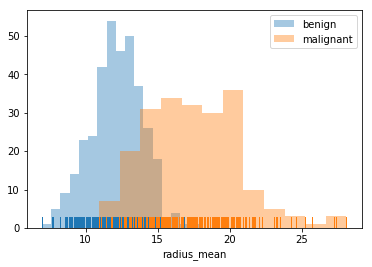

In [466]:
# Plot distribution charts for each of the features in the two classes
sns.distplot(data_benign['radius_mean'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['radius_mean'], kde=False, rug=True, label='malignant');
plt.legend()

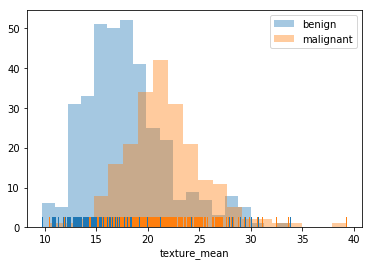

In [470]:
sns.distplot(data_benign['texture_mean'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['texture_mean'], kde=False, rug=True, label='malignant');
plt.legend()

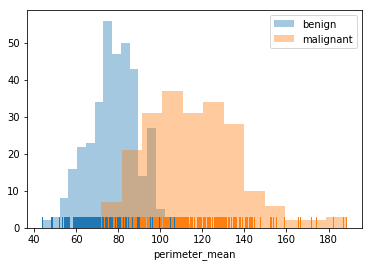

In [471]:
sns.distplot(data_benign['perimeter_mean'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['perimeter_mean'], kde=False, rug=True, label='malignant');
plt.legend()

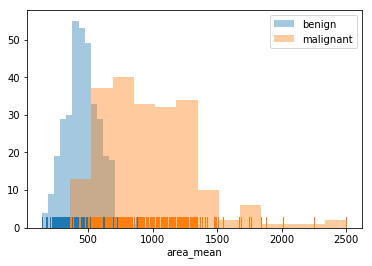

In [472]:
sns.distplot(data_benign['area_mean'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['area_mean'], kde=False, rug=True, label='malignant');
plt.legend()

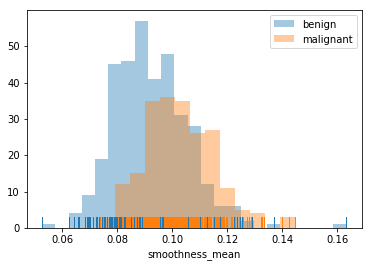

In [473]:
sns.distplot(data_benign['smoothness_mean'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['smoothness_mean'], kde=False, rug=True, label='malignant');
plt.legend()

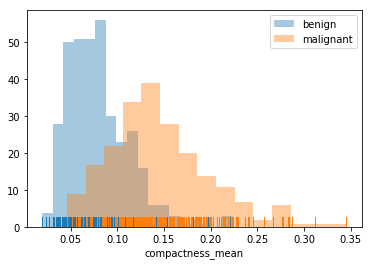

In [474]:
sns.distplot(data_benign['compactness_mean'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['compactness_mean'], kde=False, rug=True, label='malignant');
plt.legend()

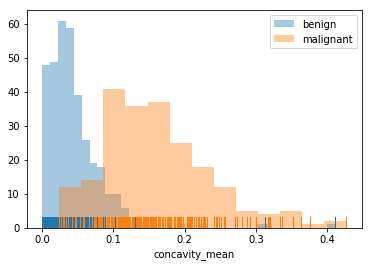

In [475]:
sns.distplot(data_benign['concavity_mean'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['concavity_mean'], kde=False, rug=True, label='malignant');
plt.legend()

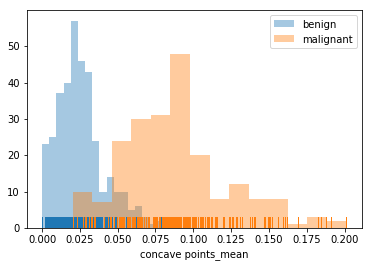

In [476]:
sns.distplot(data_benign['concave points_mean'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['concave points_mean'], kde=False, rug=True, label='malignant');
plt.legend()

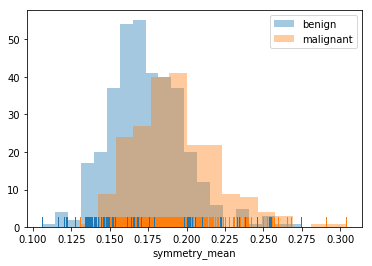

In [477]:
sns.distplot(data_benign['symmetry_mean'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['symmetry_mean'], kde=False, rug=True, label='malignant');
plt.legend()

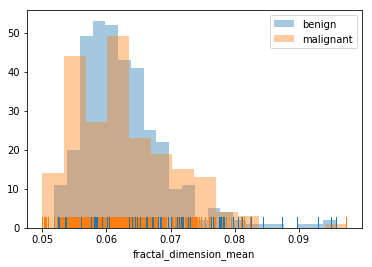

In [478]:
sns.distplot(data_benign['fractal_dimension_mean'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['fractal_dimension_mean'], kde=False, rug=True, label='malignant');
plt.legend()

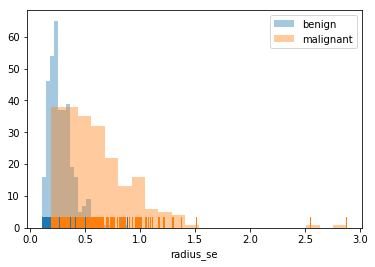

In [479]:
sns.distplot(data_benign['radius_se'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['radius_se'], kde=False, rug=True, label='malignant');
plt.legend()

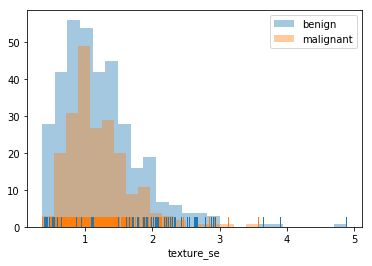

In [480]:
sns.distplot(data_benign['texture_se'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['texture_se'], kde=False, rug=True, label='malignant');
plt.legend()

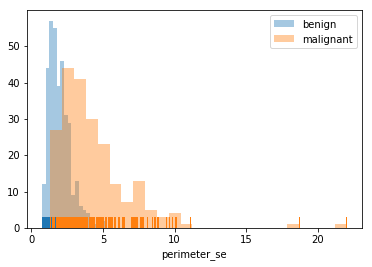

In [481]:
sns.distplot(data_benign['perimeter_se'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['perimeter_se'], kde=False, rug=True, label='malignant');
plt.legend()

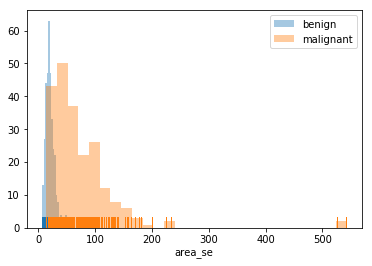

In [482]:
sns.distplot(data_benign['area_se'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['area_se'], kde=False, rug=True, label='malignant');
plt.legend()

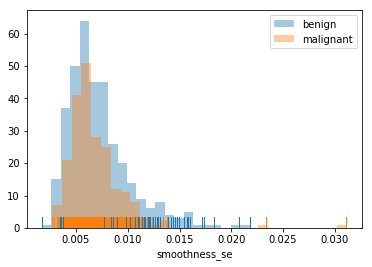

In [483]:
sns.distplot(data_benign['smoothness_se'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['smoothness_se'], kde=False, rug=True, label='malignant');
plt.legend()

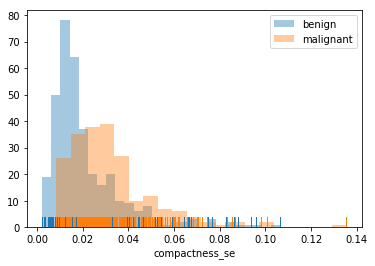

In [484]:
sns.distplot(data_benign['compactness_se'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['compactness_se'], kde=False, rug=True, label='malignant');
plt.legend()

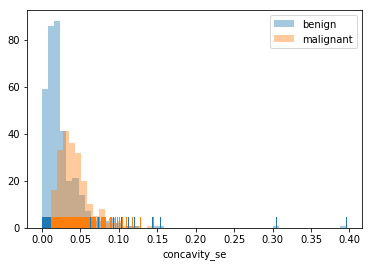

In [485]:
sns.distplot(data_benign['concavity_se'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['concavity_se'], kde=False, rug=True, label='malignant');
plt.legend()

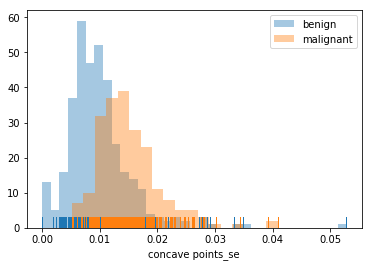

In [486]:
sns.distplot(data_benign['concave points_se'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['concave points_se'], kde=False, rug=True, label='malignant');
plt.legend()

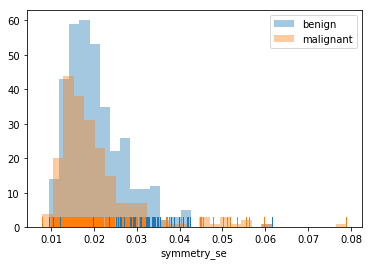

In [487]:
sns.distplot(data_benign['symmetry_se'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['symmetry_se'], kde=False, rug=True, label='malignant');
plt.legend()

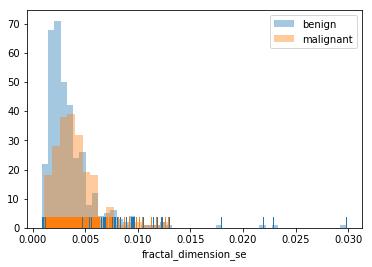

In [488]:
sns.distplot(data_benign['fractal_dimension_se'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['fractal_dimension_se'], kde=False, rug=True, label='malignant');
plt.legend()

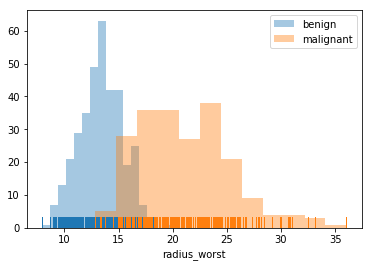

In [489]:
sns.distplot(data_benign['radius_worst'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['radius_worst'], kde=False, rug=True, label='malignant');
plt.legend()

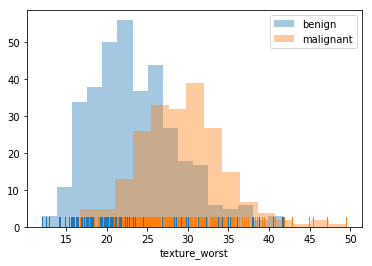

In [490]:
sns.distplot(data_benign['texture_worst'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['texture_worst'], kde=False, rug=True, label='malignant');
plt.legend()

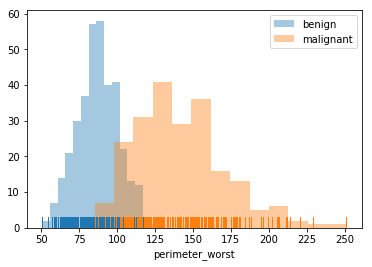

In [491]:
sns.distplot(data_benign['perimeter_worst'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['perimeter_worst'], kde=False, rug=True, label='malignant');
plt.legend()

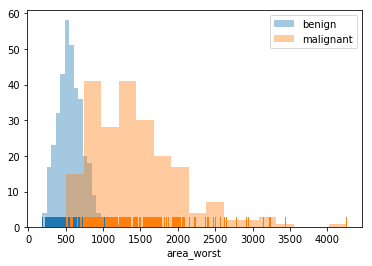

In [492]:
sns.distplot(data_benign['area_worst'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['area_worst'], kde=False, rug=True, label='malignant');
plt.legend()

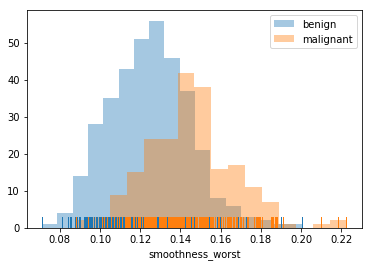

In [493]:
sns.distplot(data_benign['smoothness_worst'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['smoothness_worst'], kde=False, rug=True, label='malignant');
plt.legend()

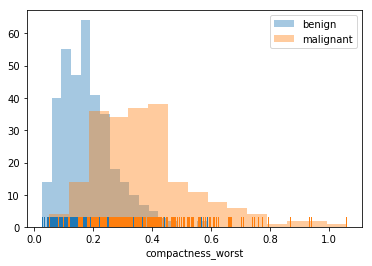

In [494]:
sns.distplot(data_benign['compactness_worst'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['compactness_worst'], kde=False, rug=True, label='malignant');
plt.legend()

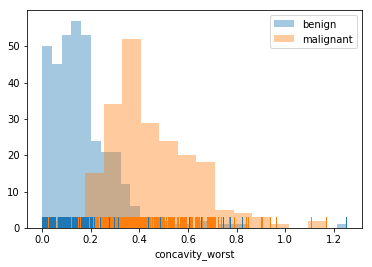

In [495]:
sns.distplot(data_benign['concavity_worst'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['concavity_worst'], kde=False, rug=True, label='malignant');
plt.legend()

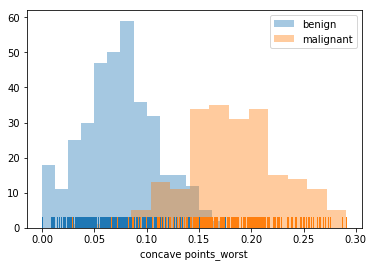

In [496]:
sns.distplot(data_benign['concave points_worst'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['concave points_worst'], kde=False, rug=True, label='malignant');
plt.legend()

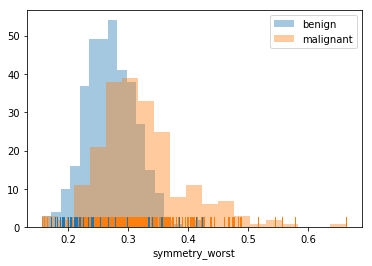

In [497]:
sns.distplot(data_benign['symmetry_worst'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['symmetry_worst'], kde=False, rug=True, label='malignant');
plt.legend()

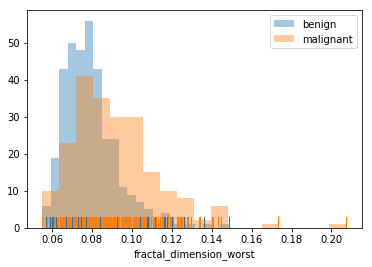

In [498]:
sns.distplot(data_benign['fractal_dimension_worst'], kde=False, rug=True, label='benign');
sns.distplot(data_malignant['fractal_dimension_worst'], kde=False, rug=True, label='malignant');
plt.legend()

In [316]:
# Scale the data using MinMaxScaler and return transformed data
def scale_data(data):
    scaler = MinMaxScaler()
    scaler.fit(data)
    return scaler.transform(data)

In [308]:
# Train a SVC model on the selected data with the given params and return fitted model
def train_svc_model(data, features, targets, kern='rbf', gamm='auto', c=1.0, deg=3):
    clf = SVC(kernel=kern, gamma=gamm, C=c, degree=deg)
    
    # Get features and targets to use
    X = data[features]
    y = data[targets]
    
    # Scale data
    X = scale_data(X)
    y = scale_data(y)
    
    # Do stratified K-fold CV with 3 splits
    kf = StratifiedKFold(n_splits=3)
    for k, (train, test) in enumerate(kf.split(X, y)):
        train_X = (data[features].iloc[train,:])
        train_y = data[targets].iloc[train]
        test_X = (data[features].iloc[test,:])
        test_y = data[targets].iloc[test]
        
        # Fit model on training subset
        clf.fit(train_X, train_y)
        print("[fold {0}], score: {1:.5f}".
          format(k, clf.score(test_X, test_y)))
    
    # Fit model on data
    clf.fit(X, y)
    print("Training accuracy: %s" % "{0:.3%}".format(clf.score(X, y)))
    
    return clf

In [309]:
# Predict the target labels on the data using the model and print F1 score and accuracy
def test_svc_model(model, data, features, targets):
    # Get features and targets to use
    X = data[features]
    y = data[targets]
    
    # Scale data
    X = scale_data(X)
    y = scale_data(y)
    
    # Predict target labels using the features
    predictions = model.predict(X)
    
    # Calculate accuracy and F1 score
    accuracy = metrics.accuracy_score(predictions, y)
    f1_score = metrics.f1_score(y, predictions)
    
    print("F1 score: %s" % "{0:.3}".format(f1_score))
    print("Accuracy: %s" % "{0:.3%}".format(accuracy))

In [310]:
# Top X features from https://www.kaggle.com/buddhiniw/breast-cancer-prediction/notebook
selected_features_top1 = ['perimeter_mean']
selected_features_top3 = ['perimeter_mean', 'concave points_mean', 'concavity_mean']
selected_features_top5 = ['perimeter_mean', 'concave points_mean', 'concavity_mean', 'area_mean', 'radius_mean']
selected_features_top10 = ['perimeter_mean', 'concave points_mean', 'concavity_mean', 'area_mean', 'radius_mean', 'compactness_mean', 'texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean']

In [374]:
# Get data features only by dropping 'diagnosis' column
data_features = data.drop('diagnosis', axis=1, inplace=False)

# Split data into stratified train and test sets with 80:20 train/test ratio.
data_train, data_test = train_test_split(data, stratify=data['diagnosis'], test_size=0.2)
print 'Training set size: %s' % len(data_train.index)
print 'Testing set size: %s' % len(data_test.index)

Training set size: 455
Testing set size: 114


In [500]:
# Train SVC using all features on training set
trained_model = train_svc_model(data_train, list(data_features), 'diagnosis')

[fold 0], score: 0.62500
[fold 1], score: 0.62500
[fold 2], score: 0.62914
Training accuracy: 95.165%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [322]:
# Train SVC model using single top feature
trained_model = train_svc_model(data_train, selected_features_top1, 'diagnosis')

[fold 0], score: 0.88816
[fold 1], score: 0.87500
[fold 2], score: 0.86093
Training accuracy: 88.571%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [323]:
test_svc_model(trained_model, data_test, selected_features_top1, 'diagnosis')

F1 score: 0.871
Accuracy: 90.351%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [324]:
# Train SVC model using top 3 features
trained_model = train_svc_model(data_train, selected_features_top3, 'diagnosis')

[fold 0], score: 0.88816
[fold 1], score: 0.88816
[fold 2], score: 0.84106
Training accuracy: 92.088%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [325]:
test_svc_model(trained_model, data_test, selected_features_top3, 'diagnosis')

F1 score: 0.918
Accuracy: 93.860%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [326]:
# Train SVC model using top 5 features
trained_model = train_svc_model(data_train, selected_features_top5, 'diagnosis')

[fold 0], score: 0.65789
[fold 1], score: 0.71053
[fold 2], score: 0.70861
Training accuracy: 90.989%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [328]:
test_svc_model(trained_model, data_test, selected_features_top5, 'diagnosis')

F1 score: 0.907
Accuracy: 92.982%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [331]:
# Train SVC model using top 10 features
trained_model = train_svc_model(data_train, selected_features_top10, 'diagnosis')

[fold 0], score: 0.63158
[fold 1], score: 0.65789
[fold 2], score: 0.64901
Training accuracy: 91.868%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [332]:
test_svc_model(trained_model, data_test, selected_features_top10, 'diagnosis')

F1 score: 0.921
Accuracy: 93.860%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [344]:
# Do grid search for best C and gamma for SVC using the top 3 features
C_range = np.logspace(0, 7, 8)
gamma_range = np.logspace(-4, 3, 8)
print C_range
print gamma_range

parameters = {'kernel':('rbf', 'sigmoid'), 'C':C_range, 'gamma':gamma_range}
svc = SVC()
clf = GridSearchCV(svc, parameters, n_jobs=1, cv=3, verbose=1)

X = data_train[selected_features_top3]
y = data_train['diagnosis']
X = scale_data(X)
y = scale_data(y)

clf.fit(X, y)
print clf.best_score_
print clf.best_params_

[  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03
   1.00000000e+04   1.00000000e+05   1.00000000e+06   1.00000000e+07]
[  1.00000000e-04   1.00000000e-03   1.00000000e-02   1.00000000e-01
   1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03]
Fitting 3 folds for each of 128 candidates, totalling 384 fits


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.931868131868
{'kernel': 'rbf', 'C': 10.0, 'gamma': 10.0}


[Parallel(n_jobs=1)]: Done 384 out of 384 | elapsed:  1.2min finished


In [345]:
# Train SVC model using the best hyperparameters found using the grid search
trained_model = train_svc_model(data_train, selected_features_top3, 'diagnosis', c=10.0, gamm=10.0)

[fold 0], score: 0.80921
[fold 1], score: 0.82895
[fold 2], score: 0.77483
Training accuracy: 93.407%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [346]:
# Test trained model
test_svc_model(trained_model, data_test, selected_features_top3, 'diagnosis')

F1 score: 0.918
Accuracy: 93.860%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [141]:
# Trains a AdaBoostClassifier model on the data
def train_bdt_model(data, features, targets, maxDepth=None, n_est=50, learn_rate=1.0, alg='SAMME.R'):
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxDepth), n_estimators=n_est, learning_rate=learn_rate, algorithm=alg)
    
    X = data[features]
    y = data[targets]
    X = scale_data(X)
    y = scale_data(y)
    
    kf = KFold(n_splits=3)
    for k, (train, test) in enumerate(kf.split(X, y)):
        train_X = (data[features].iloc[train,:])
        train_y = data[targets].iloc[train]
        test_X = (data[features].iloc[test,:])
        test_y = data[targets].iloc[test]
        
        bdt.fit(train_X, train_y)
        print("[fold {0}], score: {1:.5f}".
          format(k, bdt.score(test_X, test_y)))
    
    bdt.fit(X, y)
    print("Training accuracy: %s" % "{0:.3%}".format(bdt.score(X, y)))
    
    return bdt

In [142]:
# Train AdaBoostClassifier model using all features
trained_bdt_model = train_bdt_model(data_train, list(data_features), 'diagnosis')

[fold 0], score: 0.91447
[fold 1], score: 0.90789
[fold 2], score: 0.88079
Training accuracy: 100.000%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [143]:
test_svc_model(trained_bdt_model, data_test, list(data_features), 'diagnosis')

F1 score: 0.707
Accuracy: 70.175%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [420]:
# Train on top 10 features
trained_bdt_model = train_bdt_model(data_train, selected_features_top10, 'diagnosis')

[fold 0], score: 0.92763
[fold 1], score: 0.91447
[fold 2], score: 0.90728
Training accuracy: 100.000%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [421]:
test_svc_model(trained_bdt_model, data_test, selected_features_top10, 'diagnosis')

F1 score: 0.839
Accuracy: 86.842%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [144]:
# Train on top 5 features
trained_bdt_model = train_bdt_model(data_train, selected_features_top5, 'diagnosis')

[fold 0], score: 0.90789
[fold 1], score: 0.90789
[fold 2], score: 0.93377
Training accuracy: 100.000%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [145]:
test_svc_model(trained_bdt_model, data_test, selected_features_top5, 'diagnosis')

F1 score: 0.828
Accuracy: 86.842%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [146]:
# Train on top 3 feature
trained_bdt_model = train_bdt_model(data_train, selected_features_top3, 'diagnosis')

[fold 0], score: 0.88816
[fold 1], score: 0.88816
[fold 2], score: 0.92715
Training accuracy: 100.000%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [147]:
test_svc_model(trained_bdt_model, data_test, selected_features_top3, 'diagnosis')

F1 score: 0.851
Accuracy: 88.596%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [148]:
# Train on top single feature
trained_bdt_model = train_bdt_model(data_train, selected_features_top1, 'diagnosis')

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


[fold 0], score: 0.81579
[fold 1], score: 0.80263
[fold 2], score: 0.87417
Training accuracy: 98.901%


In [149]:
test_svc_model(trained_bdt_model, data_test, selected_features_top1, 'diagnosis')

F1 score: 0.747
Accuracy: 81.579%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [290]:
# Do grid search for best parameters to use for AdaBoostClassifier using top 3 features
n_est_range = range(50, 500, 50)
learn_rate_range = np.logspace(-9, 1, 11)
print n_est_range
print learn_rate_range

parameters = {'n_estimators':n_est_range, 'learning_rate':learn_rate_range, 'algorithm':('SAMME', 'SAMME.R')}
abc = AdaBoostClassifier(DecisionTreeClassifier())
gscv = GridSearchCV(abc, parameters)

X = data_train[selected_features_top3]
y = data_train['diagnosis']
X = scale_data(X)
y = scale_data(y)

gscv.fit(X, y)
print gscv.best_score_
print gscv.best_params_

[50, 100, 150, 200, 250, 300, 350, 400, 450]
[  1.00000000e-09   1.00000000e-08   1.00000000e-07   1.00000000e-06
   1.00000000e-05   1.00000000e-04   1.00000000e-03   1.00000000e-02
   1.00000000e-01   1.00000000e+00   1.00000000e+01]


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.916483516484
{'n_estimators': 50, 'learning_rate': 9.9999999999999995e-07, 'algorithm': 'SAMME'}


In [292]:
# Train AdaBoostClassifier model on top 3 features using best parameters found from grid search
trained_bdt_model = train_bdt_model(data_train, selected_features_top3, 'diagnosis', n_est=50, learn_rate=1.0e-08, alg='SAMME')

[fold 0], score: 0.90132
[fold 1], score: 0.88816
[fold 2], score: 0.92715
Training accuracy: 100.000%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [293]:
test_svc_model(trained_bdt_model, data_test, selected_features_top3, 'diagnosis')

F1 score: 0.881
Accuracy: 91.228%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [178]:
# Trains a RandomForestClassifier on the data
def train_rfc_model(data, features, targets, maxDepth=None, n_est=10, max_feat='auto', min_samp_split=2):
    rfc = RandomForestClassifier(max_depth=maxDepth, n_estimators=n_est, max_features=max_feat, min_samples_split=min_samp_split)
    
    X = data[features]
    y = data[targets]
    X = scale_data(X)
    y = scale_data(y)
    
    kf = KFold(n_splits=3)
    for k, (train, test) in enumerate(kf.split(X, y)):
        train_X = (data[features].iloc[train,:])
        train_y = data[targets].iloc[train]
        test_X = (data[features].iloc[test,:])
        test_y = data[targets].iloc[test]
        
        rfc.fit(train_X, train_y)
        print("[fold {0}], score: {1:.5f}".
          format(k, rfc.score(test_X, test_y)))
    
    rfc.fit(X, y)
    print("Training accuracy: %s" % "{0:.3%}".format(rfc.score(X, y)))
    
    return rfc

In [226]:
# Train RandomForestClassifier model on all the features
trained_rfc_model = train_rfc_model(data_train, list(data_features), 'diagnosis')

# Get the feature importance rankings and sort them
featimp = pd.Series(trained_rfc_model.feature_importances_, index=list(data_features)).sort_values(ascending=False)
print ''
print featimp

#print list(data_features)
#print trained_rfc_model.feature_importances_

[fold 0], score: 0.93421
[fold 1], score: 0.94737
[fold 2], score: 0.96689
Training accuracy: 99.560%

perimeter_worst            0.246738
area_mean                  0.187863
perimeter_mean             0.065499
perimeter_se               0.060154
radius_se                  0.055068
compactness_mean           0.054497
radius_worst               0.047963
concavity_mean             0.039773
concave points_mean        0.037824
concave points_worst       0.036899
concavity_worst            0.024982
area_worst                 0.024925
texture_worst              0.021528
symmetry_worst             0.016126
symmetry_mean              0.013853
texture_mean               0.013517
area_se                    0.010363
compactness_worst          0.006394
fractal_dimension_worst    0.006210
fractal_dimension_se       0.005708
radius_mean                0.004567
symmetry_se                0.004543
texture_se                 0.003673
smoothness_worst           0.003395
smoothness_mean            0.0022

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [227]:
# Test trained RandomForestClassifier model on test set
test_svc_model(trained_rfc_model, data_test, list(data_features), 'diagnosis')

F1 score: 0.863
Accuracy: 88.596%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [228]:
# Top X features from the RandomForestClassifier feature rankings above
rfc_features_top10 = ['area_worst', 'perimeter_worst', 'radius_worst', 'concave points_mean', 'concave points_worst', 'perimeter_mean', 'concavity_mean', 'area_mean', 'symmetry_worst', 'texture_worst']
rfc_features_top5 = ['area_worst', 'perimeter_worst', 'radius_worst', 'concave points_mean', 'concave points_worst']
rfc_features_top3 = ['area_worst', 'perimeter_worst', 'radius_worst']
rfc_features_top1 = ['area_worst']

In [229]:
# Train RandomForestClassifier model using top 10 features
trained_rfc_model = train_rfc_model(data_train, rfc_features_top10, 'diagnosis')

[fold 0], score: 0.94079
[fold 1], score: 0.93421
[fold 2], score: 0.96689
Training accuracy: 99.560%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [230]:
test_svc_model(trained_rfc_model, data_test, rfc_features_top10, 'diagnosis')

F1 score: 0.929
Accuracy: 94.737%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [232]:
# Train RandomForestClassifier model using top 5 features
trained_rfc_model = train_rfc_model(data_train, rfc_features_top5, 'diagnosis')

[fold 0], score: 0.94079
[fold 1], score: 0.92105
[fold 2], score: 0.94702
Training accuracy: 99.560%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [233]:
test_svc_model(trained_rfc_model, data_test, rfc_features_top5, 'diagnosis')

F1 score: 0.92
Accuracy: 93.860%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [234]:
# Train RandomForestClassifier model using top 3 features
trained_rfc_model = train_rfc_model(data_train, rfc_features_top3, 'diagnosis')

[fold 0], score: 0.88816
[fold 1], score: 0.90789
[fold 2], score: 0.92715
Training accuracy: 99.121%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [235]:
test_svc_model(trained_rfc_model, data_test, rfc_features_top3, 'diagnosis')

F1 score: 0.782
Accuracy: 83.333%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [422]:
# Train RandomForestClassifier model using top 1 features
trained_rfc_model = train_rfc_model(data_train, rfc_features_top1, 'diagnosis')

[fold 0], score: 0.88158
[fold 1], score: 0.85526
[fold 2], score: 0.87417
Training accuracy: 97.582%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [423]:
test_svc_model(trained_rfc_model, data_test, rfc_features_top1, 'diagnosis')

F1 score: 0.849
Accuracy: 90.351%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [236]:
# Do grid search for best parameters to use for RandomForestClassifier using top 10 features
n_est_range = range(5, 20, 5)
max_depth_range = range(1, 8)
min_sampSplit_range = range(10, 30, 5)

print n_est_range
print max_depth_range
print min_sampSplit_range

parameters = {'n_estimators':n_est_range, 'max_depth':max_depth_range, 'min_samples_split':min_sampSplit_range}
rfc = RandomForestClassifier(n_jobs=-1)
gscv = GridSearchCV(rfc, parameters)

X = data_train[rfc_features_top10]
y = data_train['diagnosis']
X = scale_data(X)
y = scale_data(y)

gscv.fit(X, y)
print gscv.best_score_
print gscv.best_params_

[5, 10, 15]
[1, 2, 3, 4, 5, 6, 7]
[10, 15, 20, 25]


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.956043956044
{'min_samples_split': 10, 'n_estimators': 10, 'max_depth': 6}


In [241]:
# Train RandomForestClassifier using parameters found from grid search
trained_rfc_model = train_rfc_model(data_train, rfc_features_top10, 'diagnosis', maxDepth=6, n_est=10, min_samp_split=10)

[fold 0], score: 0.95395
[fold 1], score: 0.92105
[fold 2], score: 0.96689
Training accuracy: 98.242%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [242]:
test_svc_model(trained_rfc_model, data_test, rfc_features_top10, 'diagnosis')

F1 score: 0.941
Accuracy: 95.614%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [435]:
# Train SVC model using top 10 features found using our RandomForestClassifier
trained_model = train_svc_model(data_train, rfc_features_top10, 'diagnosis')

[fold 0], score: 0.62500
[fold 1], score: 0.62500
[fold 2], score: 0.62914
Training accuracy: 96.264%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [436]:
test_svc_model(trained_model, data_test, rfc_features_top10, 'diagnosis')

F1 score: 0.95
Accuracy: 96.491%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [426]:
# Train SVC model using top 5 features found using our RandomForestClassifier
trained_model = train_svc_model(data_train, rfc_features_top5, 'diagnosis')

[fold 0], score: 0.65789
[fold 1], score: 0.60526
[fold 2], score: 0.65563
Training accuracy: 94.066%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [427]:
test_svc_model(trained_model, data_test, rfc_features_top5, 'diagnosis')

F1 score: 0.895
Accuracy: 92.982%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [428]:
# Train SVC model using top 3 features found using our RandomForestClassifier
trained_model = train_svc_model(data_train, rfc_features_top3, 'diagnosis')

[fold 0], score: 0.65132
[fold 1], score: 0.61842
[fold 2], score: 0.65563
Training accuracy: 91.209%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [429]:
test_svc_model(trained_model, data_test, rfc_features_top3, 'diagnosis')

F1 score: 0.833
Accuracy: 89.474%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [430]:
# Train SVC model using top 1 features found using our RandomForestClassifier
trained_model = train_svc_model(data_train, rfc_features_top1, 'diagnosis')

[fold 0], score: 0.69079
[fold 1], score: 0.63816
[fold 2], score: 0.68212
Training accuracy: 89.890%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [431]:
test_svc_model(trained_model, data_test, rfc_features_top1, 'diagnosis')

F1 score: 0.765
Accuracy: 85.965%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [437]:
# Grid search for best SVC parameters using top 10 features found using our RandomForestClassifier
C_range = np.logspace(0, 7, 8)
gamma_range = np.logspace(-4, 3, 8)
print C_range
print gamma_range

parameters = {'kernel':('rbf', 'sigmoid'), 'C':C_range, 'gamma':gamma_range}
svc = SVC()
clf = GridSearchCV(svc, parameters, n_jobs=-1, cv=3, verbose=1)

X = data_train[rfc_features_top10]
y = data_train['diagnosis']
X = scale_data(X)
y = scale_data(y)

clf.fit(X, y)
print clf.best_score_
print clf.best_params_

[  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03
   1.00000000e+04   1.00000000e+05   1.00000000e+06   1.00000000e+07]
[  1.00000000e-04   1.00000000e-03   1.00000000e-02   1.00000000e-01
   1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03]
Fitting 3 folds for each of 128 candidates, totalling 384 fits


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.975824175824
{'kernel': 'rbf', 'C': 100000.0, 'gamma': 0.01}


[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:    0.9s finished


In [438]:
# Train SVC model using parameters found from grid search
trained_model = train_svc_model(data_train, rfc_features_top10, 'diagnosis', c=100000.0, gamm=0.01)

[fold 0], score: 0.64474
[fold 1], score: 0.63816
[fold 2], score: 0.63576
Training accuracy: 98.462%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [442]:
test_svc_model(trained_model, data_test, rfc_features_top10, 'diagnosis')

F1 score: 0.938
Accuracy: 95.614%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [263]:
# Train AdaBoostClassifier model on top 1 feature found using our RandomForestClassifier 
trained_bdt_model = train_bdt_model(data_train, rfc_features_top1, 'diagnosis')

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


[fold 0], score: 0.85526
[fold 1], score: 0.87500
[fold 2], score: 0.88079
Training accuracy: 99.121%


In [264]:
test_svc_model(trained_bdt_model, data_test, rfc_features_top1, 'diagnosis')

F1 score: 0.813
Accuracy: 85.088%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [265]:
# Train AdaBoostClassifier model on top 3 feature found using our RandomForestClassifier 
trained_bdt_model = train_bdt_model(data_train, rfc_features_top3, 'diagnosis')

[fold 0], score: 0.89474
[fold 1], score: 0.88816
[fold 2], score: 0.91391
Training accuracy: 100.000%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [266]:
test_svc_model(trained_bdt_model, data_test, rfc_features_top3, 'diagnosis')

F1 score: 0.85
Accuracy: 89.474%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [267]:
# Train AdaBoostClassifier model on top 5 feature found using our RandomForestClassifier 
trained_bdt_model = train_bdt_model(data_train, rfc_features_top5, 'diagnosis')

[fold 0], score: 0.90789
[fold 1], score: 0.90789
[fold 2], score: 0.94702
Training accuracy: 100.000%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [268]:
test_svc_model(trained_bdt_model, data_test, rfc_features_top5, 'diagnosis')

F1 score: 0.854
Accuracy: 87.719%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [269]:
# Train AdaBoostClassifier model on top 10 feature found using our RandomForestClassifier
trained_bdt_model = train_bdt_model(data_train, rfc_features_top10, 'diagnosis')

[fold 0], score: 0.92105
[fold 1], score: 0.94737
[fold 2], score: 0.94702
Training accuracy: 100.000%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [270]:
test_svc_model(trained_bdt_model, data_test, rfc_features_top10, 'diagnosis')

F1 score: 0.897
Accuracy: 92.105%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [445]:
# Grid search for best parameters to use for AdaBoostClassifier using top 10 features found using our RandomForestClassifier
n_est_range = range(50, 500, 50)
learn_rate_range = np.logspace(-9, 1, 11)
print n_est_range
print learn_rate_range

parameters = {'n_estimators':n_est_range, 'learning_rate':learn_rate_range, 'algorithm':('SAMME', 'SAMME.R')}
abc = AdaBoostClassifier(DecisionTreeClassifier())
gscv = GridSearchCV(abc, parameters)

X = data_train[rfc_features_top10]
y = data_train['diagnosis']
X = scale_data(X)
y = scale_data(y)

gscv.fit(X, y)
print gscv.best_score_
print gscv.best_params_

[50, 100, 150, 200, 250, 300, 350, 400, 450]
[  1.00000000e-09   1.00000000e-08   1.00000000e-07   1.00000000e-06
   1.00000000e-05   1.00000000e-04   1.00000000e-03   1.00000000e-02
   1.00000000e-01   1.00000000e+00   1.00000000e+01]


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.931868131868
{'n_estimators': 400, 'learning_rate': 1e-08, 'algorithm': 'SAMME'}


In [446]:
# Train AdaBoostClassifier model using parameters found from grid search
trained_bdt_model = train_bdt_model(data_train, rfc_features_top10, 'diagnosis', n_est=400, learn_rate=1e-08, alg='SAMME')

[fold 0], score: 0.91447
[fold 1], score: 0.90132
[fold 2], score: 0.92053
Training accuracy: 100.000%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [447]:
test_svc_model(trained_bdt_model, data_test, rfc_features_top10, 'diagnosis')

F1 score: 0.892
Accuracy: 92.105%


/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
